# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
# Load data
df = pd.read_csv('data/cars.csv')

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
df2 = df.duplicated()
duplicate_items = df2.sum()
print("The number of rows in cars.csv is {}.".format(len(df)))
print("The number of duplicated rows in cars.csv is {}.".format(duplicate_items))

The number of rows in cars.csv is 11914.
The number of duplicated rows in cars.csv is 720.


In [5]:
#  2. Modify our df to have all duplicate rows removed. 
df.drop_duplicates(inplace=True)

print(df.shape)

(11194, 15)


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print("The number of duplicated rows in cars.csv after dropping duplicates is {}.".format(len(df)))


The number of duplicated rows in cars.csv after dropping duplicates is 11194.


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
print("{} is the column with the most null values".format(df.count().idxmin()))
col = df.count().idxmin()
print('There are {0} NULL values in {1}.'.format(df[col].isna().sum(), col))

Engine HP is the column with the most null values
There are 69 NULL values in Engine HP.


In [8]:
# * Print how long our dataframe is.
print("The dataframe has {} rows.".format(len(df)))


The dataframe has 11194 rows.


In [9]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print("The dataframe has {} rows after dropping rows with null values.".format(len(df)))



The dataframe has 11092 rows after dropping rows with null values.


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<BarContainer object of 47 artists>

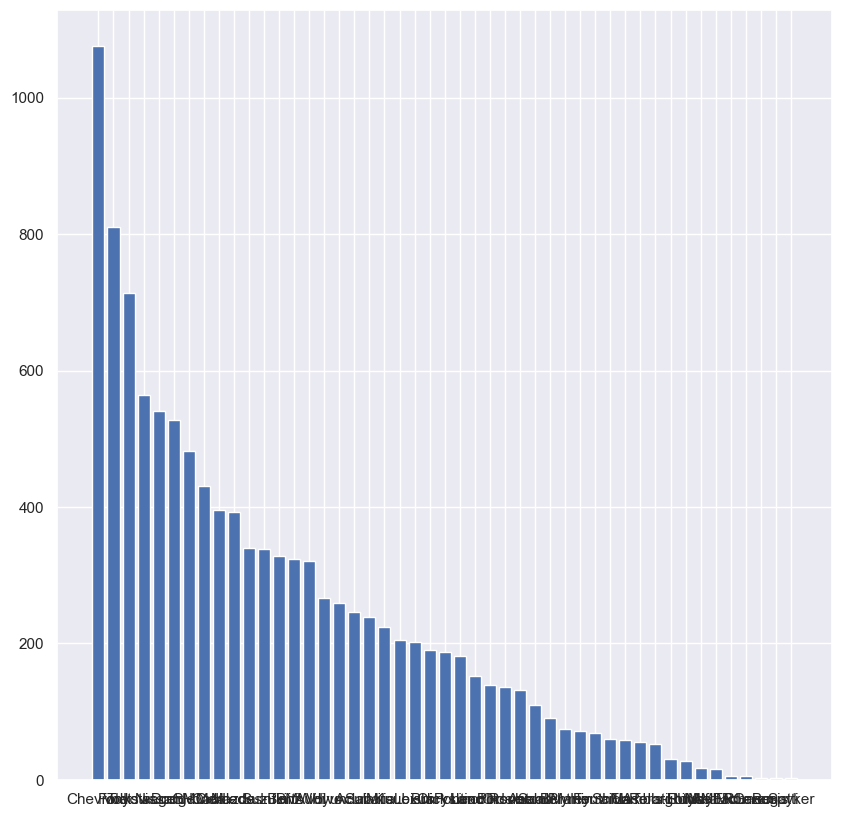

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
new_df = df.value_counts('Make')
plt.figure(figsize=(10, 10))
plt.bar(new_df.index,new_df.values)


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

Text(0.5, 1.0, 'Number of cars per Make/Brand')

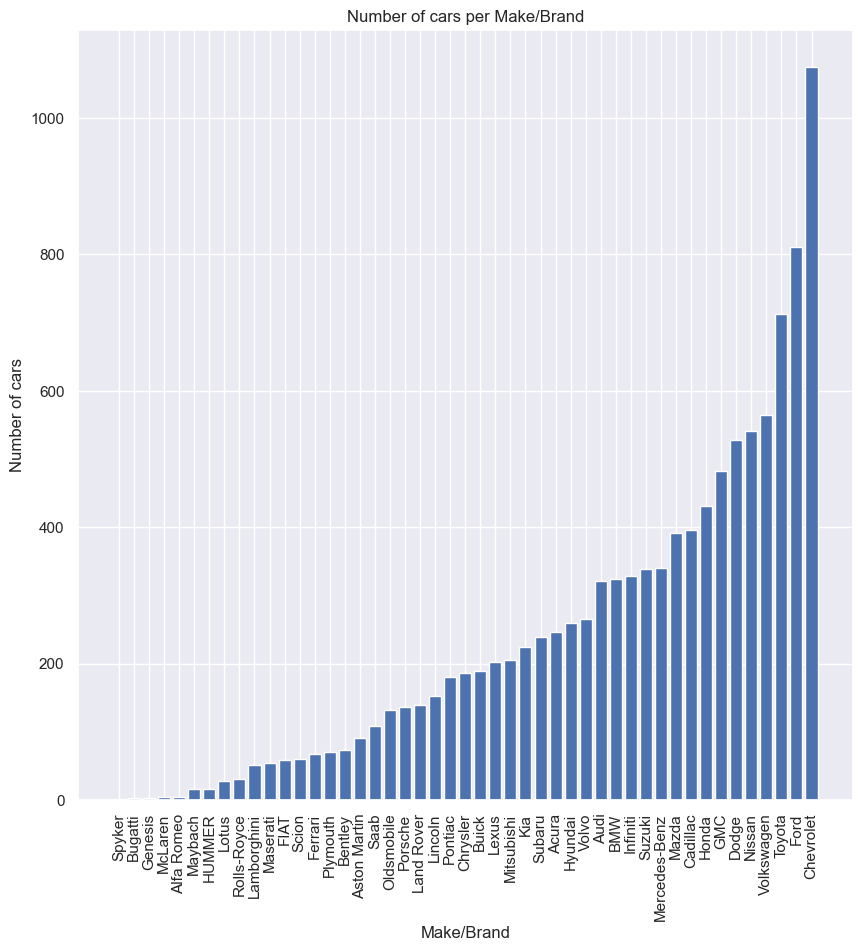

In [12]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
plt.figure(figsize=(10, 10))
new_df.sort_values(inplace=True)
plt.xticks(range(len(new_df)), new_df.index, rotation=90)
plt.bar(new_df.index,new_df.values)
plt.xlabel("Make/Brand")
plt.ylabel("Number of cars")
plt.title("Number of cars per Make/Brand")


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


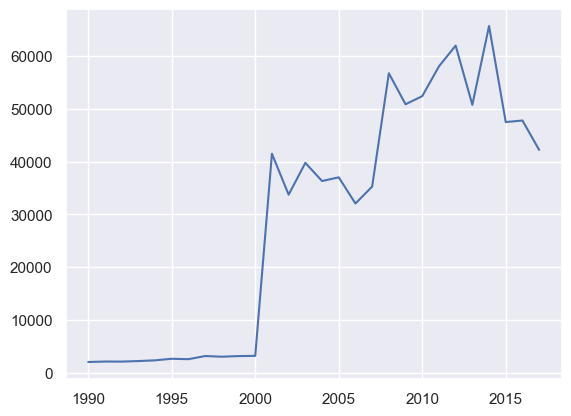

In [13]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
new = df.groupby('Year')['MSRP'].mean()
plt.plot(new.index, new.values)

#what is noticeable is that the years are being plotted by intervals of 5 and the years before 2000 the values are off


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [14]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = df['MSRP']

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = np.where(df['Year'] > 2000, df['adjusted_price'] , 10*df['MSRP'])
# df.head(100)

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

([<matplotlib.axis.YTick at 0x13f19b820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

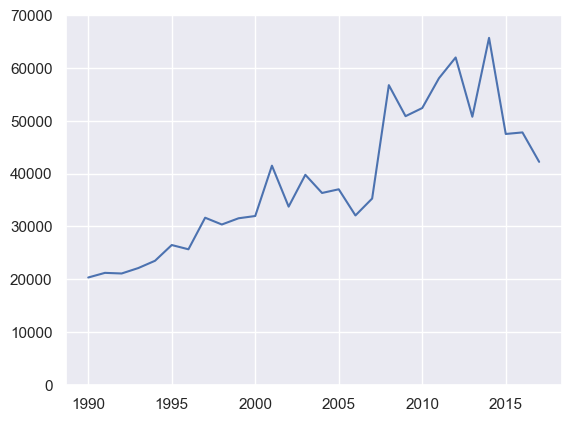

In [16]:
# Plot new prices
new = df.groupby('Year')['adjusted_price'].mean()
plt.plot(new.index, new.values)
plt.yticks(np.arange(0, 80000, 10000))



# Plot the relationship between Engine HP and highway MPG

In [ ]:
# Plot the relationship between Engine HP and highway MPG
plt.scatter(df['Engine HP'], df['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('highway MPG')


In [ ]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
select_condition = (df['highway MPG'] < 150) & (df['Engine HP'] < 800)

df_test = df[select_condition]

# Replot the relationship between Engine HP and highway MPG


In [ ]:
# Re-Plot the relationship between Engine HP and highway MPG
plt.scatter(df_test['Engine HP'], df_test['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

In [ ]:
# Make a scatter plot of Engine HP vs highway MPG
plt.scatter(df_test['Engine HP'], df_test['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [ ]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Lower Engine horsepower gives typically more highway MPG ')

# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [ ]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)

In [ ]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("City MPG and highway MPG seem to have somewhat of a linear relationship")


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

In [ ]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8, 8))
df.corr()

plt = sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm');


In [ ]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine Cylinders, and the reason different cylinders affect the horsepower of the cars.')

# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [ ]:
#Extra Credit 1

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns